In [2]:
pip install pillow numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


# Creating Dataset

In [275]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Function to create random words
def create_random_word():
    length = random.randint(3, 8)
    return ''.join(random.choices(string.ascii_lowercase, k=length))

# Function to create an image directory
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to create an easy image
def create_easy_image(text, image_size=(128, 128), font_size=40):
    text = text.capitalize()
    image = Image.new('RGB', image_size, 'white')
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)
    draw.text(position, text, fill='black', font=font)
    return np.array(image), text

# Function to create hard images
def create_hard_image(text, image_size=(128, 128), font_size=40):
    background_color = tuple(random.randint(150, 255) for _ in range(3))
    image = Image.new('RGB', image_size, background_color)
    draw = ImageDraw.Draw(image)
    font_styles = [
        "/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf",
        "/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf",
        "/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf"
    ]
    font_path = random.choice(font_styles)
    font = ImageFont.truetype(font_path, random.randint(30, font_size))
    text = ''.join(random.choice([c.upper(), c.lower()]) for c in text)
    text_color = tuple(random.randint(0, 100) for _ in range(3))  # Random dark color
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)
    draw.text(position, text, fill=text_color, font=font)  # Use random text color
    noisy_array = np.array(image) + np.random.randint(-20, 20, (image_size[1], image_size[0], 3))
    noisy_array = np.clip(noisy_array, 0, 255).astype('uint8')
    return noisy_array, text

# Function to create bonus images
def create_bonus_image(text, image_size=(128, 128), font_size=40):
    background_color = random.choice(['red', 'green'])
    image = Image.new('RGB', image_size, background_color)
    draw = ImageDraw.Draw(image)
    if background_color == 'red':
        text = text[::-1]  # Reverse the text

    # Function to generate a random color different from the background
    def get_contrast_color(background):
        # Generate a random color
        while True:
            text_color = tuple(random.randint(0, 255) for _ in range(3))  # RGB color
            # Ensure the text color is not the same as the background color
            if background == 'red' and text_color != (255, 0, 0):  # Red
                break
            elif background == 'green' and text_color != (0, 255, 0):  # Green
                break
        return text_color

    text_color = get_contrast_color(background_color)
    font_styles = [
        "/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf",
        "/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf",
        "/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf"
    ]
    font_path = random.choice(font_styles)
    font = ImageFont.truetype(font_path, font_size)
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)
    draw.text(position, text, fill=text_color, font=font)  # Use random text color
    return np.array(image), text

# Directories for saving the images
easy_dir = 'dataset/easy'
hard_dir = 'dataset/hard'
bonus_dir = 'dataset/bonus'
create_directory(easy_dir)
create_directory(hard_dir)
create_directory(bonus_dir)

# Dictionary to store images and labels
dataset_dict = {
    "easy": {},
    "hard": {},
    "bonus": {}
}

# Generate and store images in a dictionary
for i in range(50):  
    easy_word = create_random_word()
    easy_image, easy_label = create_easy_image(easy_word)
    easy_image_path = os.path.join(easy_dir, f"{easy_word}_{i}.png")
    Image.fromarray(easy_image).save(easy_image_path)
    dataset_dict["easy"][easy_image_path] = easy_label

    hard_word = create_random_word()
    hard_image, hard_label = create_hard_image(hard_word)
    hard_image_path = os.path.join(hard_dir, f"{hard_word}_{i}.png")
    Image.fromarray(hard_image).save(hard_image_path)
    dataset_dict["hard"][hard_image_path] = hard_label

    bonus_word = create_random_word()
    bonus_image, bonus_label = create_bonus_image(bonus_word)
    bonus_image_path = os.path.join(bonus_dir, f"{bonus_word}_{i}.png")
    Image.fromarray(bonus_image).save(bonus_image_path)
    dataset_dict["bonus"][bonus_image_path] = bonus_label

print("Dataset generated and stored in a dictionary!")

print("Dataset Details:")
for set_name in dataset_dict:
    print(f"{set_name.capitalize()} Set: {len(dataset_dict[set_name])} images")

print(dataset_dict)

Dataset generated and stored in a dictionary!
Dataset Details:
Easy Set: 50 images
Hard Set: 50 images
Bonus Set: 50 images
{'easy': {'dataset/easy/clqc_0.png': 'Clqc', 'dataset/easy/ucio_1.png': 'Ucio', 'dataset/easy/pwvgje_2.png': 'Pwvgje', 'dataset/easy/rhtdxgu_3.png': 'Rhtdxgu', 'dataset/easy/jtypcnzf_4.png': 'Jtypcnzf', 'dataset/easy/xwe_5.png': 'Xwe', 'dataset/easy/zkuxqc_6.png': 'Zkuxqc', 'dataset/easy/qlvg_7.png': 'Qlvg', 'dataset/easy/ttfhp_8.png': 'Ttfhp', 'dataset/easy/epbply_9.png': 'Epbply', 'dataset/easy/iqfrzt_10.png': 'Iqfrzt', 'dataset/easy/pwseifu_11.png': 'Pwseifu', 'dataset/easy/jagr_12.png': 'Jagr', 'dataset/easy/mdr_13.png': 'Mdr', 'dataset/easy/hzippjd_14.png': 'Hzippjd', 'dataset/easy/tohzzgod_15.png': 'Tohzzgod', 'dataset/easy/wqyxxycc_16.png': 'Wqyxxycc', 'dataset/easy/dzobbdvg_17.png': 'Dzobbdvg', 'dataset/easy/zazzmm_18.png': 'Zazzmm', 'dataset/easy/wumemljv_19.png': 'Wumemljv', 'dataset/easy/dfq_20.png': 'Dfq', 'dataset/easy/fcanqfi_21.png': 'Fcanqfi', 'dat

# Display Images

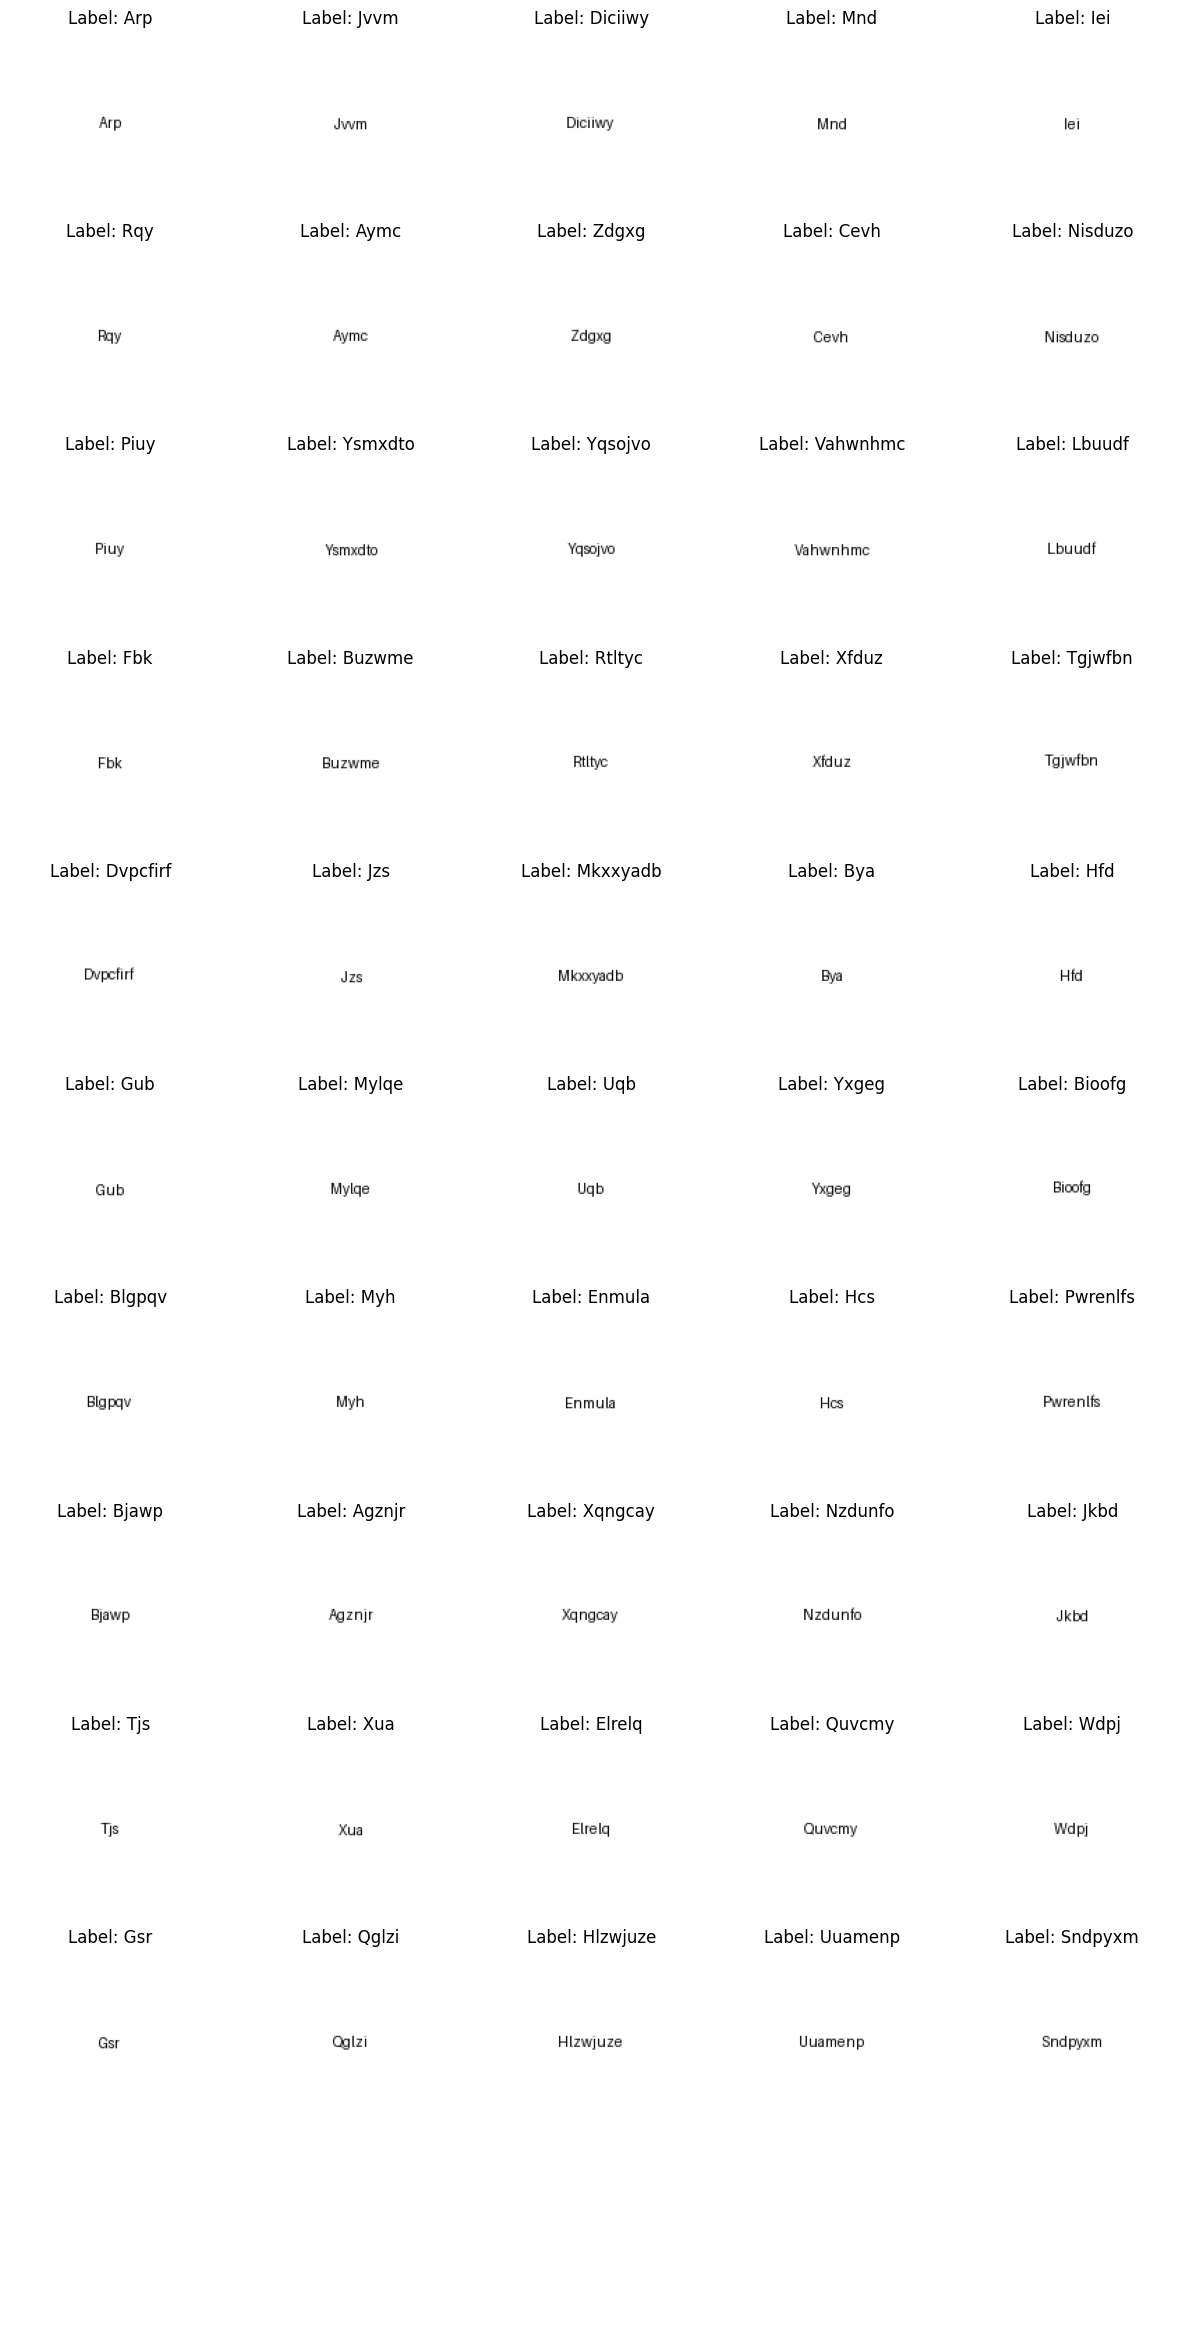

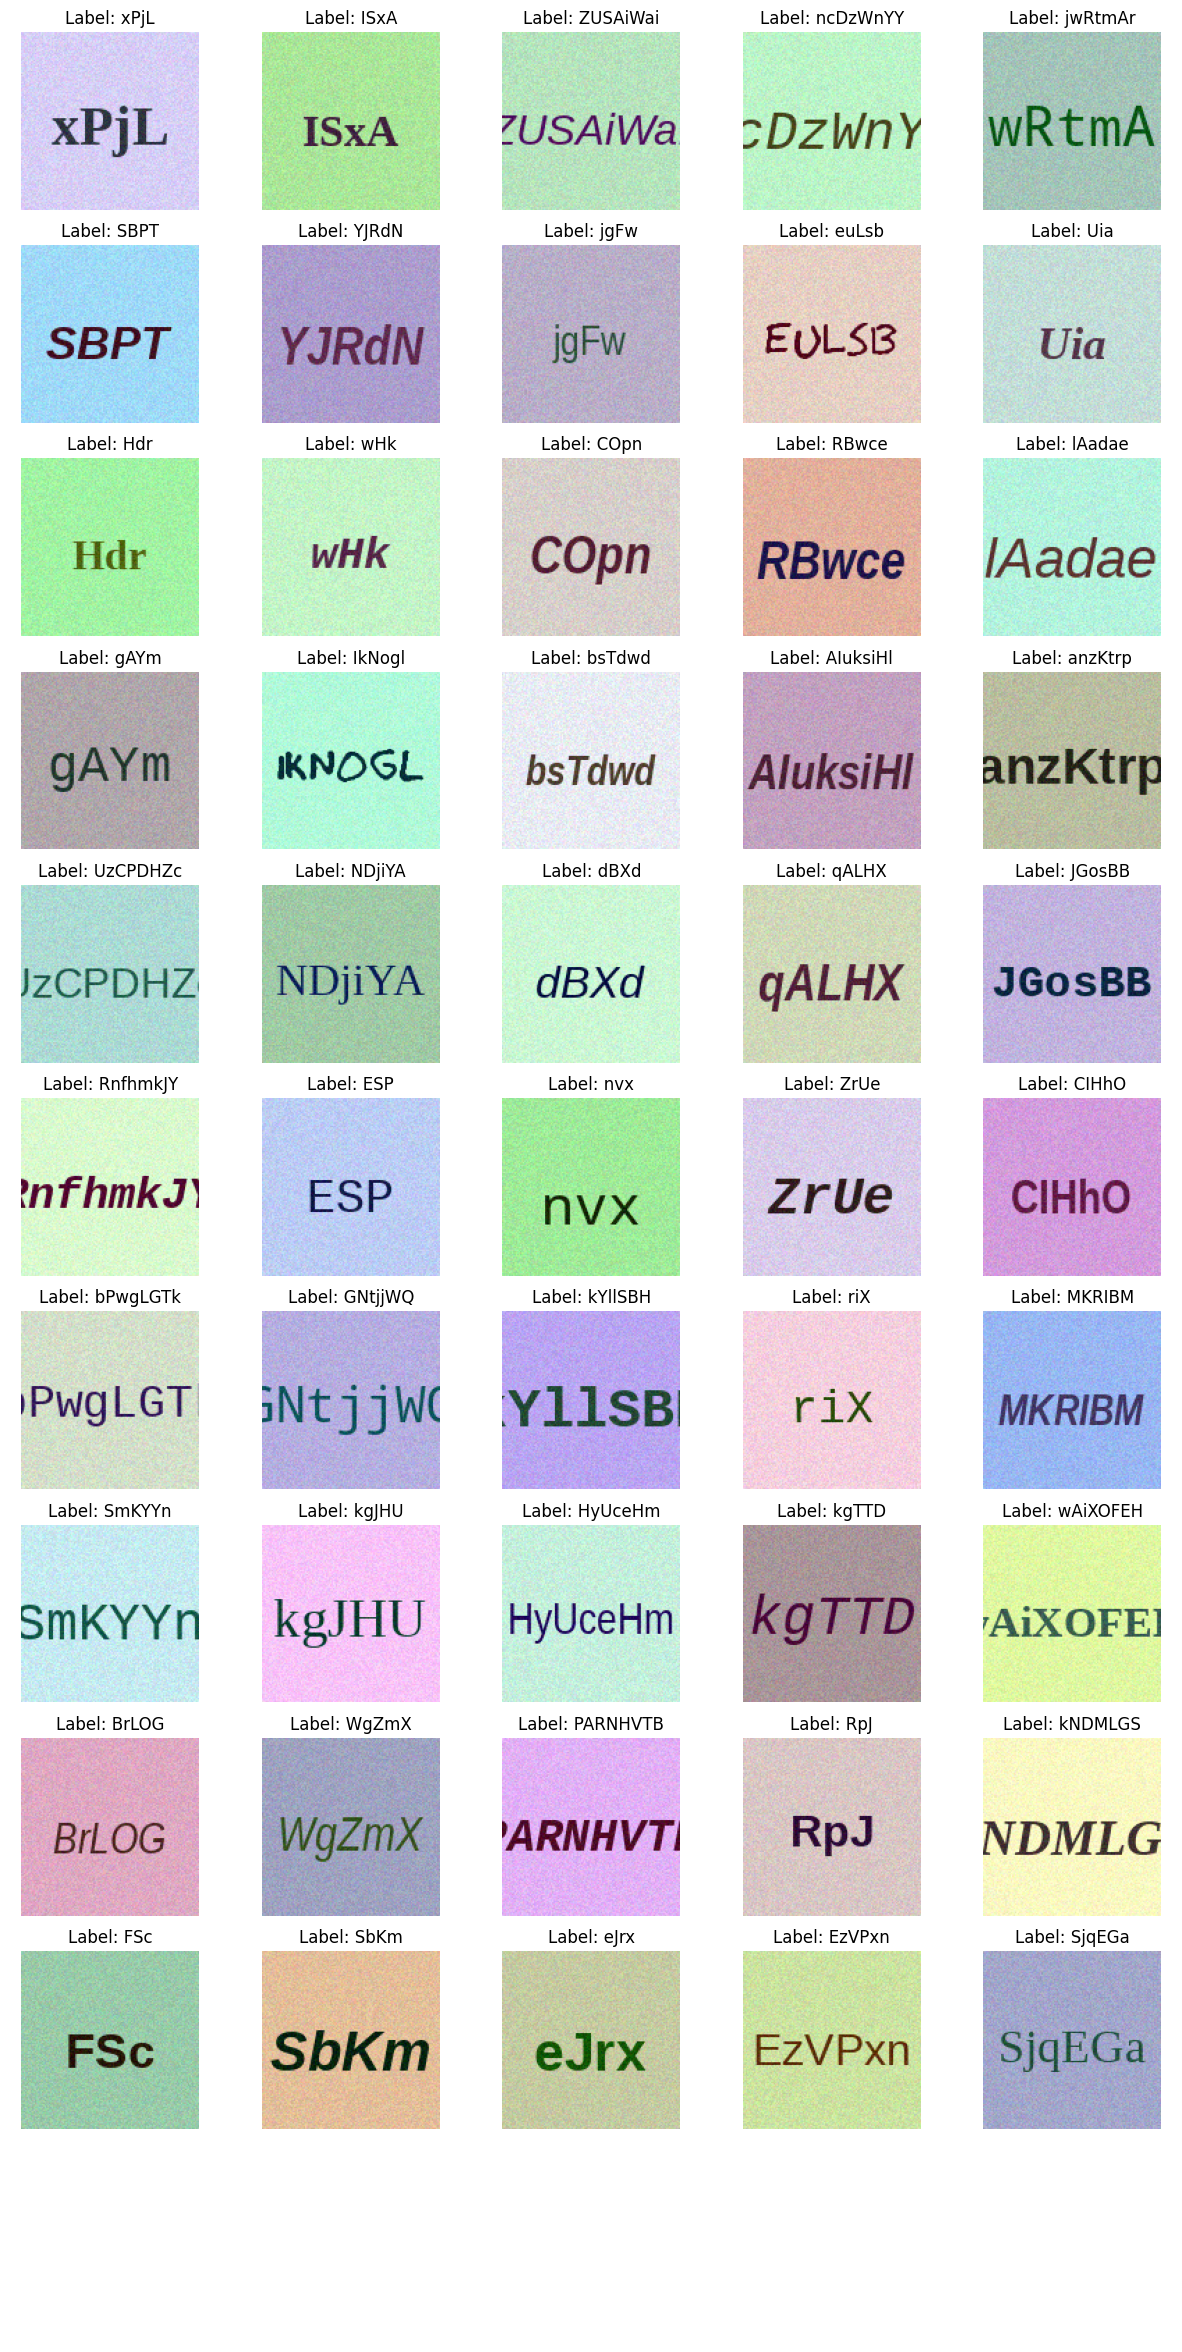

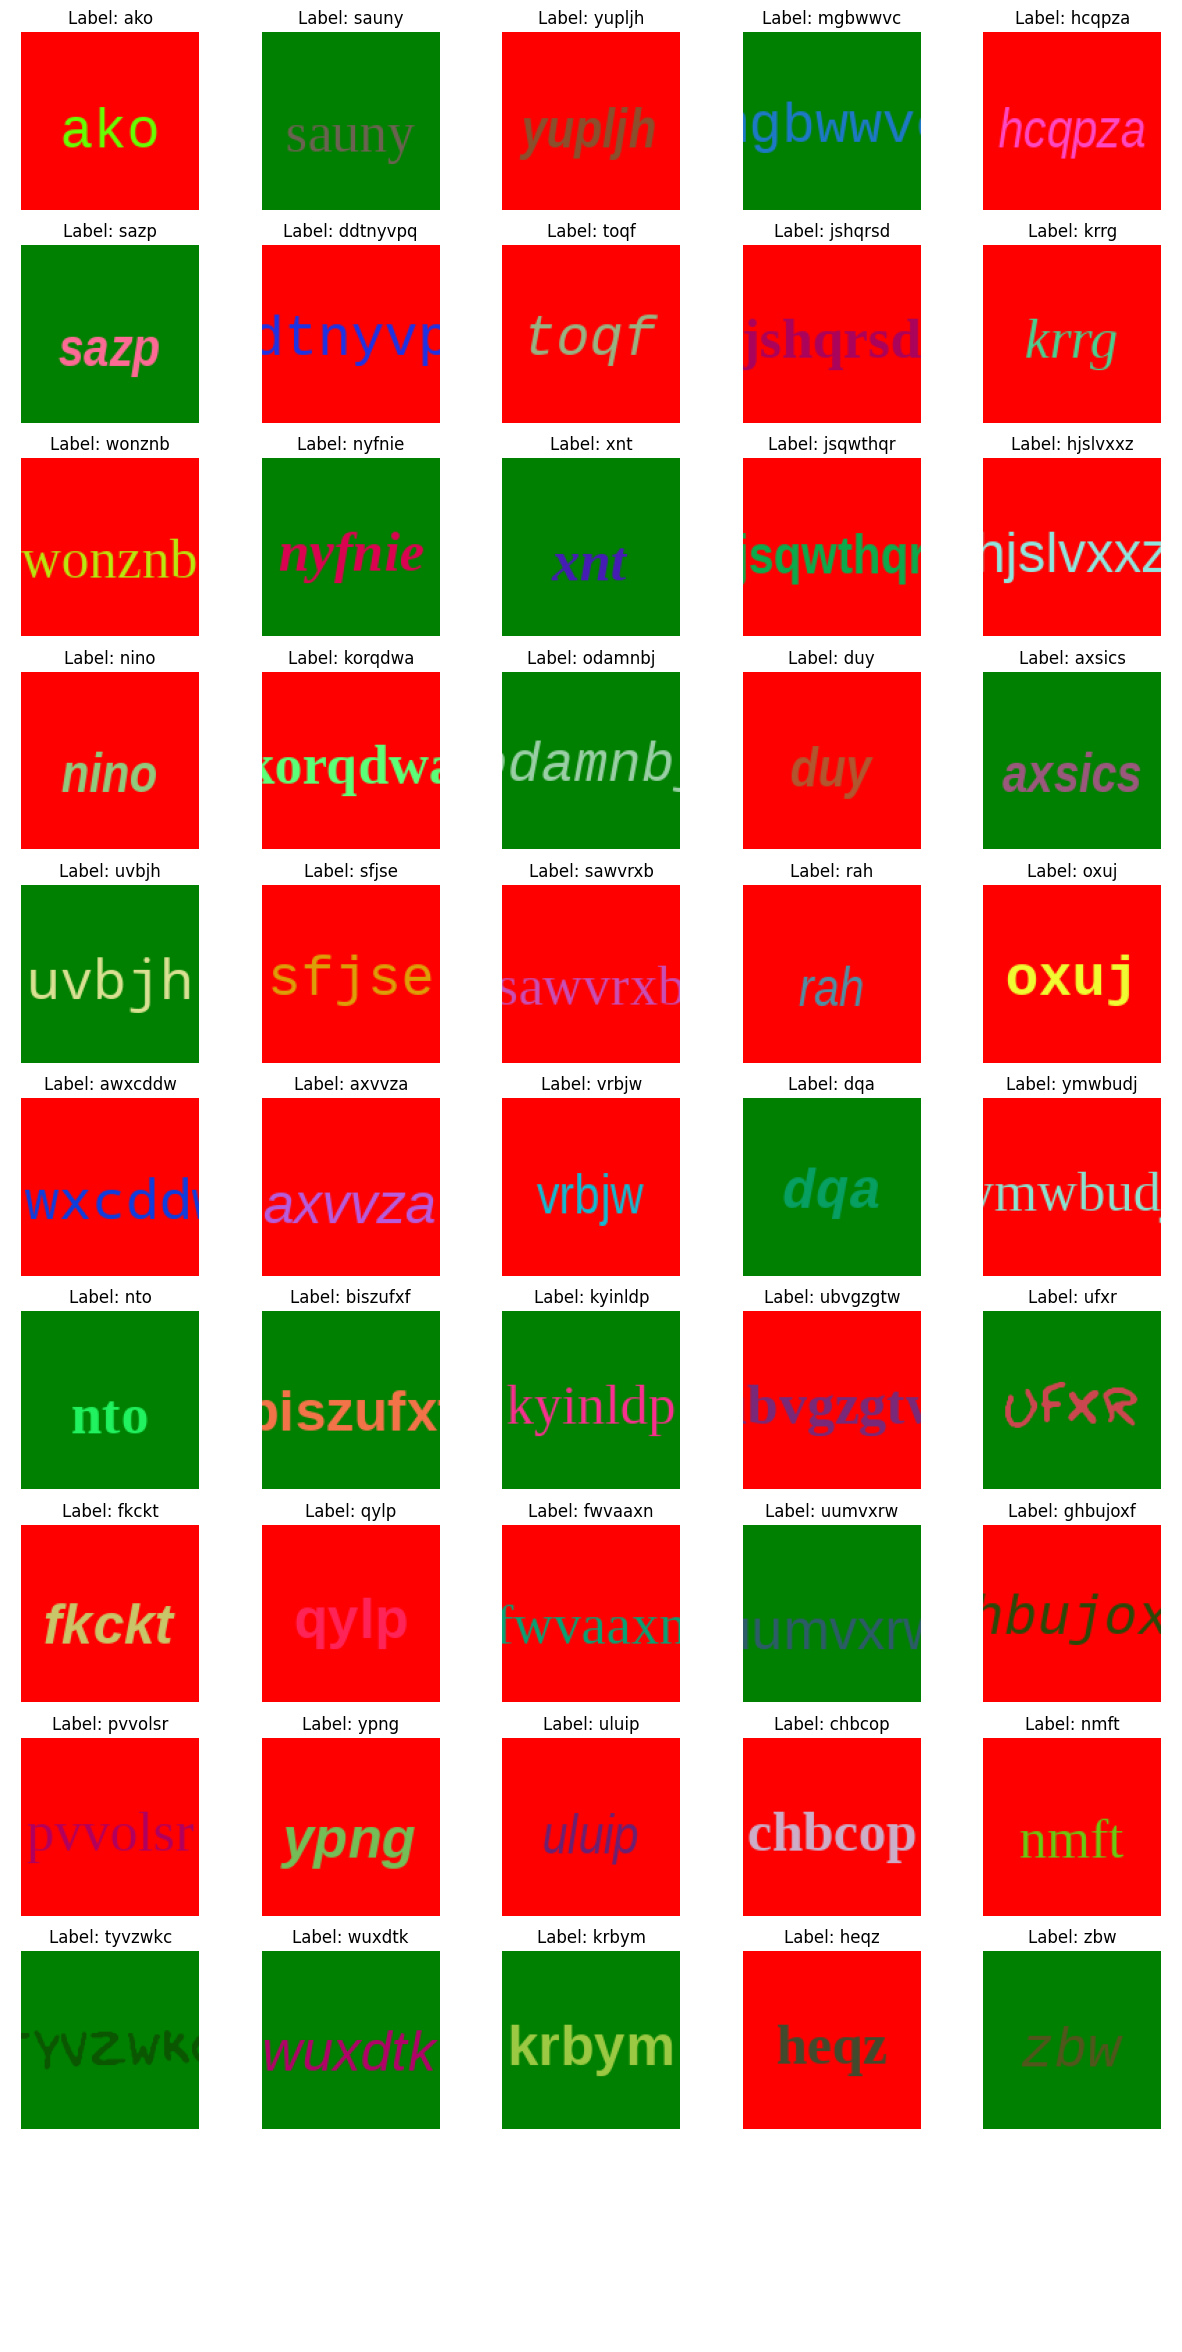

In [2]:
import matplotlib.pyplot as plt

def display_images(data_dict):
    image_paths = list(data_dict.keys())
    labels = list(data_dict.values())
    num_images = len(image_paths)
    
    fig, axes = plt.subplots((num_images // 5) + 1, 5, figsize=(15, (num_images // 5) * 3))
    axes = axes.flatten()
    
    for i in range(num_images):
        image = Image.open(image_paths[i])
        axes[i].imshow(image)
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis("off")
    
    for i in range(num_images, len(axes)):
        axes[i].axis("off")
    
    plt.show()

# Display all images from dictionary
display_images(dataset_dict["easy"])
display_images(dataset_dict["hard"])
display_images(dataset_dict["bonus"])

## Data Augmentation

Color

In [276]:
import os
from PIL import Image, ImageEnhance
import random
from scipy.ndimage import map_coordinates, gaussian_filter

# Define Color Jitter Parameters
BRIGHTNESS_FACTOR = 0.2  # Range of brightness adjustment
CONTRAST_FACTOR = 0.2  # Range of contrast adjustment

# Augmented Dataset Dictionary
augmented_dataset_dict = {
    "easy": {},
    "hard": {},
    "bonus": {}
}

# Elastic Deformation Parameters
ALPHA = 8  # Scaling factor for displacement
SIGMA = 3  # Smoothing factor for deformation

# Augmented dataset dictionary for elastic deformation
elastic_augmented_dataset_dict = {
    "easy": {},
    "hard": {},
    "bonus": {}
}

# Function to apply Color Jitter augmentation
def apply_color_jitter(image_path):
    image = Image.open(image_path).convert("RGB")

    # Apply brightness adjustment
    brightness = ImageEnhance.Brightness(image)
    image = brightness.enhance(1 + random.uniform(-BRIGHTNESS_FACTOR, BRIGHTNESS_FACTOR))

    # Apply contrast adjustment
    contrast = ImageEnhance.Contrast(image)
    image = contrast.enhance(1 + random.uniform(-CONTRAST_FACTOR, CONTRAST_FACTOR))

    return image


# Apply Color Jitter to all images and save augmented versions
for category in dataset_dict.keys():
    for image_path, label in dataset_dict[category].items():
        # Load and apply color jitter
        augmented_image = apply_color_jitter(image_path)

        # Create augmented image filename
        base_name = os.path.basename(image_path)
        augmented_image_path = image_path.replace(".png", "_aug.png")

        # Save the augmented image
        augmented_image.save(augmented_image_path)

        # Store in augmented dataset dictionary
        augmented_dataset_dict[category][augmented_image_path] = label

# Merge both original and augmented datasets
#full_dataset_dict = {category: {**dataset_dict[category], **augmented_dataset_dict[category]} for category in dataset_dict.keys()}

print("Augmentation complete! Dataset size has doubled.")

Augmentation complete! Dataset size has doubled.


Elastic

In [277]:
import numpy as np
from scipy.ndimage import map_coordinates, gaussian_filter
from PIL import Image
import os

# Elastic Deformation Parameters
ALPHA = 8  # Scaling factor for displacement
SIGMA = 3  # Smoothing factor for deformation

# Augmented dataset dictionary for elastic deformation
elastic_augmented_dataset_dict = {
    "easy": {},
    "hard": {},
    "bonus": {}
}

# Function to apply Elastic Deformation
def apply_elastic_deformation(image_path, alpha=ALPHA, sigma=SIGMA):
    image = Image.open(image_path).convert("RGB")
    image_array = np.array(image)

    # Generate random displacement fields
    shape = image_array.shape[:2]
    dx = gaussian_filter((np.random.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((np.random.rand(*shape) * 2 - 1), sigma) * alpha

    # Generate coordinate grid
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))

    # Apply deformation
    deformed_image = np.zeros_like(image_array)
    for i in range(3):  # Apply deformation for each RGB channel
        deformed_image[..., i] = map_coordinates(image_array[..., i], indices, order=1, mode='reflect').reshape(shape)

    return Image.fromarray(deformed_image)

# Apply Elastic Deformation to all images and save augmented versions
for category in dataset_dict.keys():
    for image_path, label in dataset_dict[category].items():
        # Load and apply elastic deformation
        augmented_image = apply_elastic_deformation(image_path)

        # Create augmented image filename
        base_name = os.path.basename(image_path)
        augmented_image_path = image_path.replace(".png", "_elastic.png")

        # Save the augmented image
        augmented_image.save(augmented_image_path)

        # Store in augmented dataset dictionary
        elastic_augmented_dataset_dict[category][augmented_image_path] = label

# Merge original, color jitter, and elastic deformation augmented datasets
full_dataset_dict = {
    category: {**dataset_dict[category], **augmented_dataset_dict[category], **elastic_augmented_dataset_dict[category]}
    for category in dataset_dict.keys()
}

print("Elastic deformation augmentation complete!")
print(f"Final dataset size: {sum(len(full_dataset_dict[c]) for c in full_dataset_dict.keys())}")

# Example: Access an Elastic Augmented Image
example_key = list(elastic_augmented_dataset_dict["easy"].keys())[0]
print(f"Example Elastic Augmented Image Path: {example_key}, Label: {elastic_augmented_dataset_dict['easy'][example_key]}")


Elastic deformation augmentation complete!
Final dataset size: 450
Example Elastic Augmented Image Path: dataset/easy/clqc_0_elastic.png, Label: Clqc


Preprocessing, Split, Data Load

In [278]:

import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import LabelEncoder

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),  # Convert to tensor (scales to [0, 1])
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Custom Dataset Class
class CaptchaDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        # Flatten the dataset dictionary into image paths and labels
        self.image_paths = list(data_dict.keys())  # List of image paths
        self.labels = list(data_dict.values())  # Corresponding labels
        self.transform = transform
        # Assuming labels are strings, use LabelEncoder to convert them to integers
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(self.labels)  # Convert to integers
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])  # Open image using PIL
        label = self.labels[idx]  # Get corresponding label
        
        if self.transform:
            image = self.transform(image)  # Apply transformations

        # Convert label to tensor (assuming label is an integer or a list)
        label = torch.tensor(label, dtype=torch.long)  # Make sure label is a tensor
        
        return image, label


# Flatten the dataset for both easy and hard sets
all_data = {**full_dataset_dict['easy'], **full_dataset_dict['hard']}  # Merge easy and hard datasets

# Instantiate the full dataset
full_dataset = CaptchaDataset(data_dict=all_data, transform=transform)

# Define the split sizes
train_size = int(0.7 * len(full_dataset))  # 70% for training
val_size = int(0.15 * len(full_dataset))  # 15% for validation
test_size = len(full_dataset) - train_size - val_size  # Remaining 15% for testing

# Perform the split
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Check the data loader by printing a batch of images and labels
for images, labels in val_loader:
    print(f"Images batch shape: {images.shape}, Labels batch size: {len(labels)}")
    break


Images batch shape: torch.Size([32, 1, 128, 128]), Labels batch size: 32


Task - 1 (Classification)

CNN with 3Conv Layers

In [279]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=100):
        super(CNNModel, self).__init__()
        
        # Define the first convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel (grayscale)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        # Define the fully connected (FC) layers
        self.fc1 = nn.Linear(128 * 16 * 16, 512)  # Flattened output after pooling
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer with num_classes output neurons
        
        # Define activation function and pooling layers
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling with 2x2 kernel size
        self.relu = nn.ReLU()  # ReLU activation function
        
    def forward(self, x):
        # Apply the first convolutional block
        x = self.pool(self.relu(self.conv1(x)))  # Apply conv1 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv2(x)))  # Apply conv2 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv3(x)))  # Apply conv3 -> ReLU -> Pooling
        
        # Flatten the output from the convolutional layers to feed into the FC layer
        x = x.view(-1, 128 * 16 * 16)  # Flatten: batch_size x 128 * 16 * 16
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))  # Apply FC1 layer with ReLU
        x = self.fc2(x)  # Final output layer
        
        return x  # Return logits for each class

# Instantiate the model
model = CNNModel(num_classes=100)  # We have 100 classes in your dataset


CNN with 3Conv Layers + BN

In [280]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the CNN model with Batch Normalization
class CNNModel(nn.Module):
    def __init__(self, num_classes=100):
        super(CNNModel, self).__init__()
        
        # Define the first convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel (grayscale)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization after conv1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization after conv2
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # Batch Normalization after conv3
        
        # Define the fully connected (FC) layers
        self.fc1 = nn.Linear(128 * 16 * 16, 512)  # Flattened output after pooling
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer with num_classes output neurons
        
        # Define activation function and pooling layers
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling with 2x2 kernel size
        self.relu = nn.ReLU()  # ReLU activation function
        
    def forward(self, x):
        # Apply the first convolutional block
        x = self.pool(self.relu(self.bn1(self.conv1(x))))  # Conv1 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn2(self.conv2(x))))  # Conv2 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn3(self.conv3(x))))  # Conv3 -> BatchNorm -> ReLU -> Pooling
        
        # Flatten the output from the convolutional layers to feed into the FC layer
        x = x.view(-1, 128 * 16 * 16)  # Flatten: batch_size x 128 * 16 * 16
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))  # Apply FC1 layer with ReLU
        x = self.fc2(x)  # Final output layer
        
        return x  # Return logits for each class

# Instantiate the model with batch normalization
model = CNNModel(num_classes=100)  # You can adjust the number of classes based on your dataset


 CNN with 4Conv Layers

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the updated CNN model with increased depth
class CNNModel(nn.Module):
    def __init__(self, num_classes=100):
        super(CNNModel, self).__init__()
        
        # Define the convolutional blocks with increased depth
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel (grayscale)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)  # Added new conv layer
        
        # Define the fully connected (FC) layers
        self.fc1 = nn.Linear(256 * 8 * 8, 512)  # Adjusted flattened size after adding another conv layer
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer with num_classes output neurons
        
        # Define activation function and pooling layers
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling with 2x2 kernel size
        self.relu = nn.ReLU()  # ReLU activation function
        
    def forward(self, x):
        # Apply the convolutional blocks with increased depth
        x = self.pool(self.relu(self.conv1(x)))  # Apply conv1 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv2(x)))  # Apply conv2 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv3(x)))  # Apply conv3 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv4(x)))  # Apply conv4 -> ReLU -> Pooling
        
        # Flatten the output from the convolutional layers to feed into the FC layer
        x = x.view(-1, 256 * 8 * 8)  # Flatten: batch_size x 256 * 8 * 8 (adjusted for new conv layer)
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))  # Apply FC1 layer with ReLU
        x = self.fc2(x)  # Final output layer
        
        return x  # Return logits for each class

# Instantiate the model
model = CNNModel(num_classes=100)  # We have 100 classes in your dataset


CNN with 4Conv Layers + BN

In [281]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the updated CNN model with increased depth and Batch Normalization
class CNNModel(nn.Module):
    def __init__(self, num_classes=100):
        super(CNNModel, self).__init__()
        
        # Define the convolutional blocks with increased depth and BatchNorm
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel (grayscale)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after conv1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after conv2
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after conv3
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)  # Added new conv layer
        self.bn4 = nn.BatchNorm2d(256)  # BatchNorm after conv4
        
        # Define the fully connected (FC) layers
        self.fc1 = nn.Linear(256 * 8 * 8, 512)  # Adjusted flattened size after adding another conv layer
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer with num_classes output neurons
        
        # Define activation function and pooling layers
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling with 2x2 kernel size
        self.relu = nn.ReLU()  # ReLU activation function
        
    def forward(self, x):
        # Apply the convolutional blocks with increased depth and BatchNorm
        x = self.pool(self.relu(self.bn1(self.conv1(x))))  # Apply conv1 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn2(self.conv2(x))))  # Apply conv2 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn3(self.conv3(x))))  # Apply conv3 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn4(self.conv4(x))))  # Apply conv4 -> BatchNorm -> ReLU -> Pooling
        
        # Flatten the output from the convolutional layers to feed into the FC layer
        x = x.view(-1, 256 * 8 * 8)  # Flatten: batch_size x 256 * 8 * 8 (adjusted for new conv layer)
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))  # Apply FC1 layer with ReLU
        x = self.fc2(x)  # Final output layer
        
        return x  # Return logits for each class

# Instantiate the model
model = CNNModel(num_classes=100)  # We have 100 classes in your dataset


CNN with 5Conv Layers

In [282]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the updated CNN model with increased depth
class CNNModel(nn.Module):
    def __init__(self, num_classes=100):
        super(CNNModel, self).__init__()
        
        # Define the convolutional blocks with increased depth
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel (grayscale)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)  # Added new conv layer
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)  # Added another conv layer
        
        # Define the fully connected (FC) layers
        self.fc1 = nn.Linear(512 * 4 * 4, 512)  # Adjusted flattened size after adding another conv layer
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer with num_classes output neurons
        
        # Define activation function and pooling layers
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling with 2x2 kernel size
        self.relu = nn.ReLU()  # ReLU activation function
        
    def forward(self, x):
        # Apply the convolutional blocks with increased depth
        x = self.pool(self.relu(self.conv1(x)))  # Apply conv1 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv2(x)))  # Apply conv2 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv3(x)))  # Apply conv3 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv4(x)))  # Apply conv4 -> ReLU -> Pooling
        x = self.pool(self.relu(self.conv5(x)))  # Apply conv5 -> ReLU -> Pooling
        
        # Flatten the output from the convolutional layers to feed into the FC layer
        x = x.view(-1, 512 * 4 * 4)  # Flatten: batch_size x 512 * 4 * 4 (adjusted for new conv layer)
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))  # Apply FC1 layer with ReLU
        x = self.fc2(x)  # Final output layer
        
        return x  # Return logits for each class

# Instantiate the model
model = CNNModel(num_classes=100)  # We have 100 classes in your dataset


CNN with 5Conv Layers + BN

In [283]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the updated CNN model with increased depth and batch normalization
class CNNModel(nn.Module):
    def __init__(self, num_classes=100):
        super(CNNModel, self).__init__()
        
        # Define the convolutional blocks with increased depth and batch normalization
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel (grayscale)
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization after conv1
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch normalization after conv2
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # Batch normalization after conv3
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)  # Added new conv layer
        self.bn4 = nn.BatchNorm2d(256)  # Batch normalization after conv4
        
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)  # Added another conv layer
        self.bn5 = nn.BatchNorm2d(512)  # Batch normalization after conv5
        
        # Define the fully connected (FC) layers
        self.fc1 = nn.Linear(512 * 4 * 4, 512)  # Adjusted flattened size after adding another conv layer
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer with num_classes output neurons
        
        # Define activation function and pooling layers
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling with 2x2 kernel size
        self.relu = nn.ReLU()  # ReLU activation function
        
    def forward(self, x):
        # Apply the convolutional blocks with increased depth and batch normalization
        x = self.pool(self.relu(self.bn1(self.conv1(x))))  # Apply conv1 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn2(self.conv2(x))))  # Apply conv2 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn3(self.conv3(x))))  # Apply conv3 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn4(self.conv4(x))))  # Apply conv4 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(self.relu(self.bn5(self.conv5(x))))  # Apply conv5 -> BatchNorm -> ReLU -> Pooling
        
        # Flatten the output from the convolutional layers to feed into the FC layer
        x = x.view(-1, 512 * 4 * 4)  # Flatten: batch_size x 512 * 4 * 4 (adjusted for new conv layer)
        
        # Apply fully connected layers
        x = self.relu(self.fc1(x))  # Apply FC1 layer with ReLU
        x = self.fc2(x)  # Final output layer
        
        return x  # Return logits for each class

# Instantiate the model
model = CNNModel(num_classes=100)  # We have 100 classes in your dataset


Train and Evaluate

Epoch 1/10 - Train Loss: 6.2724, Train Accuracy: 1.43% - Train Correct Predictions: 3/210
Epoch 1/10 - Val Loss: 4.8439, Val Accuracy: 0.00% - Val Correct Predictions: 0/45
Epoch 2/10 - Train Loss: 4.9799, Train Accuracy: 2.38% - Train Correct Predictions: 5/210
Epoch 2/10 - Val Loss: 4.9089, Val Accuracy: 2.22% - Val Correct Predictions: 1/45
Epoch 3/10 - Train Loss: 4.3887, Train Accuracy: 1.90% - Train Correct Predictions: 4/210
Epoch 3/10 - Val Loss: 4.8424, Val Accuracy: 0.00% - Val Correct Predictions: 0/45
Epoch 4/10 - Train Loss: 4.1821, Train Accuracy: 3.33% - Train Correct Predictions: 7/210
Epoch 4/10 - Val Loss: 4.8454, Val Accuracy: 2.22% - Val Correct Predictions: 1/45
Epoch 5/10 - Train Loss: 3.9187, Train Accuracy: 4.29% - Train Correct Predictions: 9/210
Epoch 5/10 - Val Loss: 4.8532, Val Accuracy: 0.00% - Val Correct Predictions: 0/45
Epoch 6/10 - Train Loss: 3.7259, Train Accuracy: 10.00% - Train Correct Predictions: 21/210
Epoch 6/10 - Val Loss: 4.8202, Val Accuracy

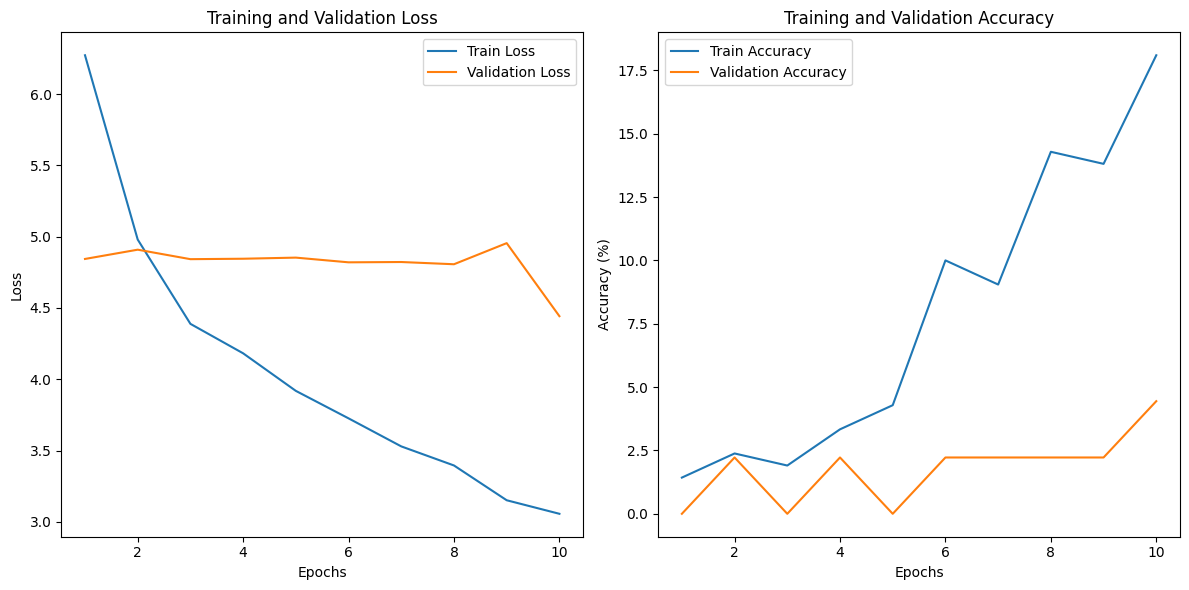

Test Loss: 4.7659, Test Accuracy: 8.89%
Test Correct Predictions: 4/45


In [284]:
import matplotlib.pyplot as plt# Use the CNN model with 3 conv blocks
model = CNNModel(num_classes=100)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training function with learning curve and correct predictions
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Initialize lists to store loss and accuracy values for plotting
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()  # Clear gradients
            
            # Forward pass
            outputs = model(images)
            
            # Calculate loss
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            running_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
        
        # Compute training accuracy and loss
        train_loss = running_loss / len(train_loader)
        train_accuracy = (correct_predictions / total_predictions) * 100
        
        # Store values for learning curve
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Print training stats and correct predictions
        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% - "
              f"Train Correct Predictions: {correct_predictions}/{total_predictions}")
        
        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        with torch.no_grad():  # No gradient calculation during evaluation
            for images, labels in val_loader:

                images, labels = images.to(device), labels.to(device)
                
                # Forward pass
                outputs = model(images)
                
                # Calculate loss
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                correct_predictions += (predicted == labels).sum().item()
                total_predictions += labels.size(0)
        
        # Compute validation accuracy and loss
        val_loss = val_loss / len(val_loader)
        val_accuracy = (correct_predictions / total_predictions) * 100
        
        # Store values for learning curve
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print validation stats and correct predictions
        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}% - "
              f"Val Correct Predictions: {correct_predictions}/{total_predictions}")
    
    # Plot Learning Curves (Loss and Accuracy)
    plot_learning_curve(train_losses, val_losses, train_accuracies, val_accuracies)

# Function to plot the learning curve
def plot_learning_curve(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

# Start training the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Function to test the model
def test_model(model, test_loader, criterion):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Initialize variables to track loss and accuracy
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No gradient calculation during testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate loss
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    # Compute the average test loss and accuracy
    test_loss /= len(test_loader)
    test_accuracy = (correct_predictions / total_predictions) * 100

    # Print test statistics
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Correct Predictions: {correct_predictions}/{total_predictions}")

# Call the test function
test_model(model, test_loader, criterion)

Task-2 (Generation)

Data Preprocessing, Data Loader

In [285]:
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from collections import defaultdict

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((128, 128)),  # Resize to fit CRNN input shape
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Get all unique characters from dataset
def build_vocab(data_dict):
    all_chars = set()
    for label in data_dict.values():
        all_chars.update(label)
    char_list = sorted(list(all_chars))  # Sort characters for consistency
    char_list.append("<PAD>")  # Add padding token
    char2idx = {char: idx for idx, char in enumerate(char_list)}
    idx2char = {idx: char for char, idx in char2idx.items()}
    return char2idx, idx2char

# Custom Dataset Class for CAPTCHA
class CaptchaDataset(Dataset):
    def __init__(self, data_dict, transform=None, max_label_length=8):
        self.image_paths = list(data_dict.keys())  # Image file paths
        self.labels = list(data_dict.values())  # Text labels
        self.transform = transform
        self.max_label_length = max_label_length  # Fixed sequence length
        
        # Build vocabulary (char2idx mapping)
        self.char2idx, self.idx2char = build_vocab(data_dict)

    def __len__(self):
        return len(self.image_paths)
    
    def encode_label(self, label):
        """
        Convert label string into a list of integer indices.
        Pad with <PAD> token if shorter than max_label_length.
        """
        label_encoded = [self.char2idx[char] for char in label]  # Convert each char to index
        # Pad to fixed length
        label_encoded += [self.char2idx["<PAD>"]] * (self.max_label_length - len(label_encoded))
        return torch.tensor(label_encoded, dtype=torch.long)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Open and convert to grayscale
        label = self.labels[idx]  # Text label
        
        if self.transform:
            image = self.transform(image)  # Apply transformations
        
        label_tensor = self.encode_label(label)  # Convert text label to tensor

        return image, label_tensor


# Merge both 'easy' and 'hard' dataset dictionaries
full_dataset_dict = {**full_dataset_dict['easy'], **full_dataset_dict['hard']}

# Instantiate Dataset
full_dataset = CaptchaDataset(data_dict=full_dataset_dict, transform=transform)

# Split dataset
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Check a batch
for images, labels in val_loader:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"First label (as indices): {labels[0]}")
    break


Image batch shape: torch.Size([16, 1, 128, 128])
Label batch shape: torch.Size([16, 8])
First label (as indices): tensor([15, 32, 33, 26, 51, 40, 40, 26])


Model

In [287]:
import torch
import torch.nn as nn

class CRNN(nn.Module):
    def __init__(self, num_classes, hidden_size=256):
        super(CRNN, self).__init__()
        
        # CNN Feature Extractor
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)  # Pooling to reduce feature map size

        # LSTM for sequence modeling
        self.rnn = nn.LSTM(input_size=256, hidden_size=hidden_size, num_layers=2, bidirectional=True, batch_first=True)

        # Fully connected layer (outputs probabilities for each character)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Bidirectional LSTM * 2

    def forward(self, x):
        # CNN Feature Extraction
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        
        # Reshape for LSTM
        b, c, h, w = x.size()  # Expecting shape: [batch, channels, height, width]
        x = x.view(b, c, -1).permute(2, 0, 1)  # [width, batch, channels]
        
        # RNN (LSTM)
        rnn_out, _ = self.rnn(x)  # LSTM forward pass
        
        # Fully Connected Layer (Character Probabilities)
        output = self.fc(rnn_out)  # [sequence_length, batch, num_classes]

        return output


Train and Evaluate

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
crnn_model = CRNN(num_classes=len(full_dataset.char2idx)).to(device)
criterion = nn.CTCLoss(blank=0, reduction='mean', zero_infinity=True)  # CTC Loss
optimizer = optim.Adam(crnn_model.parameters(), lr=0.001)

# Lists to store loss, accuracy, and CER
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
train_cers, val_cers = [], []

# Function to decode predictions
def decode_predictions(preds, idx2char):
    """
    Convert raw model output (logits) into readable text by selecting the most probable characters
    and removing duplicate consecutive characters & blank tokens.
    """
    pred_texts = []
    for pred in preds:
        decoded_text = []
        prev_char = None
        for idx in pred:
            if idx != prev_char and idx != 0:  # Remove duplicate and blank (index 0 is blank token)
                decoded_text.append(idx2char[idx])
            prev_char = idx
        pred_texts.append("".join(decoded_text))
    return pred_texts

# Levenshtein distance function (edit distance)
def levenshtein_distance(str1, str2):
    len_str1 = len(str1)
    len_str2 = len(str2)

    # Create a distance matrix
    matrix = [[0] * (len_str2 + 1) for _ in range(len_str1 + 1)]

    # Initialize the matrix
    for i in range(len_str1 + 1):
        matrix[i][0] = i
    for j in range(len_str2 + 1):
        matrix[0][j] = j

    # Populate the matrix with the minimum edit distance
    for i in range(1, len_str1 + 1):
        for j in range(1, len_str2 + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(matrix[i - 1][j] + 1,  # Deletion
                               matrix[i][j - 1] + 1,  # Insertion
                               matrix[i - 1][j - 1] + cost)  # Substitution

    return matrix[len_str1][len_str2]

# Calculate CER (Character Error Rate)
def calculate_cer(pred, target):
    # Compute the Levenshtein distance
    edit_distance = levenshtein_distance(pred, target)

    # Calculate CER
    cer = edit_distance / float(len(target))
    return cer

# Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    crnn_model.train()
    running_loss, total_correct, total_samples, total_cer = 0.0, 0, 0, 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = crnn_model(images)
        outputs = outputs.log_softmax(2)

        batch_size = images.size(0)
        input_lengths = torch.full((batch_size,), outputs.size(0), dtype=torch.long, device=device)
        target_lengths = torch.IntTensor([len(label[label != 0]) for label in labels]).to(device)

        # Compute CTC Loss
        loss = criterion(outputs, labels, input_lengths, target_lengths)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Decode Predictions
        preds = outputs.detach().cpu().argmax(2).permute(1, 0).numpy()  # Get most probable indices
        pred_texts = decode_predictions(preds, full_dataset.idx2char)
        true_texts = [decode_predictions([label.cpu().numpy()], full_dataset.idx2char)[0] for label in labels]

        # Compute Accuracy & CER
        for pred, true in zip(pred_texts, true_texts):
            if pred == true:
                total_correct += 1
            total_cer += calculate_cer(pred, true)

        total_samples += batch_size

    # Compute Metrics
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = total_correct / total_samples
    avg_train_cer = total_cer / total_samples

    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)
    train_cers.append(avg_train_cer)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.4f}, CER: {avg_train_cer:.4f}")

    # Validation Loop
    crnn_model.eval()
    val_loss, val_correct, val_samples, val_cer = 0.0, 0, 0, 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = crnn_model(images)
            outputs = outputs.log_softmax(2)

            batch_size = images.size(0)
            input_lengths = torch.full((batch_size,), outputs.size(0), dtype=torch.long, device=device)
            target_lengths = torch.IntTensor([len(label[label != 0]) for label in labels]).to(device)

            loss = criterion(outputs, labels, input_lengths, target_lengths)
            val_loss += loss.item()

            # Decode Predictions
            preds = outputs.detach().cpu().argmax(2).permute(1, 0).numpy()
            pred_texts = decode_predictions(preds, full_dataset.idx2char)
            true_texts = [decode_predictions([label.cpu().numpy()], full_dataset.idx2char)[0] for label in labels]

            # Compute Accuracy & CER
            for pred, true in zip(pred_texts, true_texts):
                if pred == true:
                    val_correct += 1
                val_cer += calculate_cer(pred, true)

            val_samples += batch_size

    # Compute Validation Metrics
    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_correct / val_samples
    avg_val_cer = val_cer / val_samples

    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)
    val_cers.append(avg_val_cer)

    print(f"Validation Loss: {avg_val_loss:.4f}, Acc: {avg_val_acc:.4f}, CER: {avg_val_cer:.4f}")

# Plot Metrics
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label="Val Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

# Accuracy & CER Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Acc", marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Val Acc", marker='s')
plt.plot(range(1, num_epochs + 1), train_cers, label="Train CER", marker='^', linestyle='dashed')
plt.plot(range(1, num_epochs + 1), val_cers, label="Val CER", marker='d', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy / CER")
plt.title("Accuracy & Character Error Rate")
plt.legend()
plt.grid()

plt.show()


Epoch [1/30] - Training Loss: 27.5119, Acc: 0.0000, CER: 1.7861
Validation Loss: 6.4506, Acc: 0.0000, CER: 1.0000
Epoch [2/30] - Training Loss: 5.2550, Acc: 0.0000, CER: 1.0000
Validation Loss: 4.2385, Acc: 0.0000, CER: 1.0000
Epoch [3/30] - Training Loss: 3.9154, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.8417, Acc: 0.0000, CER: 1.0000
Epoch [4/30] - Training Loss: 3.6955, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.6834, Acc: 0.0000, CER: 1.0000
Epoch [5/30] - Training Loss: 3.6012, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.6512, Acc: 0.0000, CER: 1.0000
Epoch [6/30] - Training Loss: 3.6271, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.6569, Acc: 0.0000, CER: 1.0000
Epoch [7/30] - Training Loss: 3.5885, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.6522, Acc: 0.0000, CER: 1.0000
Epoch [8/30] - Training Loss: 3.5624, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.6443, Acc: 0.0000, CER: 1.0000
Epoch [9/30] - Training Loss: 3.5382, Acc: 0.0000, CER: 1.0000
Validation Loss: 3.6124, Acc: 0.

Task-3

Data Preprocessing

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((128, 32)),  # Resize to fit CRNN input shape
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Get all unique characters from dataset
def build_vocab(data_dict):
    all_chars = set()
    for label in data_dict.values():
        all_chars.update(label)
    char_list = sorted(list(all_chars))  # Sort characters for consistency
    char_list.append("<PAD>")  # Add padding token
    char2idx = {char: idx for idx, char in enumerate(char_list)}
    idx2char = {idx: char for char, idx in char2idx.items()}
    return char2idx, idx2char

# Custom Dataset Class for CAPTCHA
class CaptchaDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        self.image_paths = list(data_dict.keys())  # Image file paths
        self.labels = list(data_dict.values())  # Text labels
        self.transform = transform
        
        # Build vocabulary (char2idx mapping)
        self.char2idx, self.idx2char = build_vocab(data_dict)

    def __len__(self):
        return len(self.image_paths)
    
    def encode_label(self, label):
        """
        Convert label string into a list of integer indices.
        """
        label_encoded = [self.char2idx[char] for char in label]  # Convert each char to index
        label_length = len(label_encoded)  # Store actual length for CTC Loss
        return torch.tensor(label_encoded, dtype=torch.long), torch.tensor(label_length, dtype=torch.long)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Open and convert to grayscale
        label, label_length = self.encode_label(self.labels[idx])  # Convert text label to tensor
        
        if self.transform:
            image = self.transform(image)  # Apply transformations

        return image, label, label_length



# Instantiate Dataset
full_dataset = CaptchaDataset(data_dict=full_dataset_dict['bonus'], transform=transform)

# Split dataset
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create DataLoaders
def collate_fn(batch):
    images, labels, label_lengths = zip(*batch)  # Unpack batch data
    
    images = torch.stack(images)  # Convert list of images to tensor
    
    # Concatenate all labels into a single tensor (CTC Loss requires 1D labels)
    labels = torch.cat(labels)  

    label_lengths = torch.stack(label_lengths)  # Convert to tensor
    
    return images, labels, label_lengths

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Check a batch
for images, labels, label_lengths in val_loader:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"Label lengths batch shape: {label_lengths.shape}")
    print(f"First label (as indices): {labels[0]}")
    break
